# Find the Flag
    - Task: to identify the continent of the country from the data of the flag
    - data from [link](http://archive.ics.uci.edu/ml/datasets/Flags)
    

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('flag.csv',header = 0)
data.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [11]:
data.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

# Attribute Information:
  1. name	Name of the country concerned
  2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
  3. zone	Geographic quadrant, based on Greenwich and the Equator
                1=NE, 2=SE, 3=SW, 4=NW
  4. area	in thousands of square km
  5. population	in round millions
  6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic,9=Japanese/Turkish/Finnish/Magyar, 10=Others
  7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,5=Ethnic, 6=Marxist, 7=Others
  8. bars     Number of vertical bars in the flag
  9. stripes  Number of horizontal stripes in the flag
  10. colours  Number of different colours in the flag
  11. red      0 if red absent, 1 if red present in the flag
  12. green    same for green
  13. blue     same for blue
  14. gold     same for gold (also yellow)
  15. white    same for white
  16. black    same for black
  17. orange   same for orange (also brown)
  18. mainhue  predominant colour in the flag (tie-breaks decided by taking
               the topmost hue, if that fails then the most central hue,
               and if that fails the leftmost hue)
  19. circles  Number of circles in the flag
  20. crosses  Number of (upright) crosses
  21. saltires Number of diagonal crosses
  22. quarters Number of quartered sections
  23. sunstars Number of sun or star symbols
  24. crescent 1 if a crescent moon symbol present, else 0
  25. triangle 1 if any triangles present, 0 otherwise
  26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
  27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)
               present, 0 otherwise
  28. text     1 if any letters or writing on the flag (e.g., a motto or
               slogan), 0 otherwise
  29. topleft  colour in the top-left corner (moving right to decide 
               tie-breaks)
  30. botright Colour in the bottom-left corner (moving left to decide 
               tie-breaks)


In [24]:
# process data - use colours to id landmass
labels = data['Landmass']
colours = ['Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange','Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle']
colour_data = data[colours]

In [25]:
# split data into train and test
x_train,x_test,y_train,y_test = train_test_split(colour_data,labels,random_state =1)

In [26]:
# train a descision tree 
classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.4489795918367347

In [27]:
# tuning - by pruning the tree
score = []
for i in range(1,20):
    classifier = DecisionTreeClassifier(random_state=1,max_depth=i)
    classifier.fit(x_train,y_train)
    #print('Score for depth {} is {}'.format(i,classifier.score(x_test,y_test)))
    score.append(classifier.score(x_test,y_test))

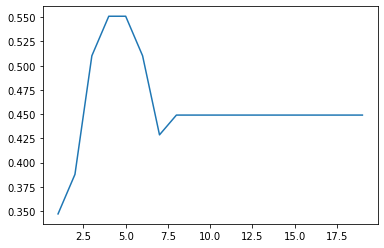

In [28]:
plt.plot(range(1,20),score)
plt.show()